# EDA

In [1]:
import os

import numpy as np
import pandas as pd

import plotly.express as ex
import matplotlib.pyplot as plt
import seaborn as sns

params

In [2]:
DATA_DIR = '/Users/leejuyeon/Downloads/playground-series-s3e17'

## import data

In [3]:
df = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))
print(df.shape)
df.head()

(136429, 14)


,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

data_descr

In [5]:
num_cols = []
cat_cols = []

for colname in df.columns[1:]:
    if df[colname].dtype in ['int64', 'float64']:
        num_cols.append(colname)
    else:
        cat_cols.append(colname)

len(num_cols), len(cat_cols)

(11, 2)

수치형 데이터의 분포

In [6]:
print("num_cols: ", num_cols)

num_cols:  ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']


In [7]:
df[num_cols].describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'Air temperature [K]'}>,
        <Axes: title={'center': 'Process temperature [K]'}>,
        <Axes: title={'center': 'Rotational speed [rpm]'}>],
       [<Axes: title={'center': 'Torque [Nm]'}>,
        <Axes: title={'center': 'Tool wear [min]'}>,
        <Axes: title={'center': 'Machine failure'}>],
       [<Axes: title={'center': 'TWF'}>, <Axes: title={'center': 'HDF'}>,
        <Axes: title={'center': 'PWF'}>],
       [<Axes: title={'center': 'OSF'}>, <Axes: title={'center': 'RNF'}>,
        <Axes: >]], dtype=object)

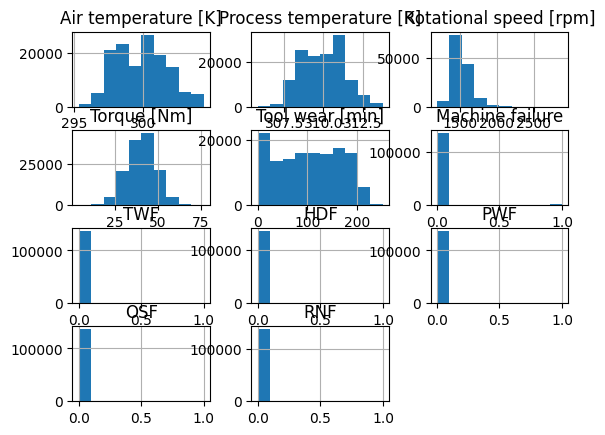

In [8]:
df[num_cols].hist()

In [9]:
from scipy.stats import skew

In [10]:
positive_skewed_cols = []
negative_skewed_cols = []

for col in num_cols:
    # Calculate skewness
    skewness = skew(df[col], nan_policy='omit')
    exceptions = len(df[col].unique()) > 2
    print(f"{col} skewness: ", skewness)
    if (skewness >= 1) and exceptions:
        positive_skewed_cols.append(col)
    elif (skewness <= -1) and exceptions:
        negative_skewed_cols.append(col)

print(positive_skewed_cols)
print(negative_skewed_cols)

Air temperature [K] skewness:  0.16117309633640917
Process temperature [K] skewness:  0.05708761025751099
Rotational speed [rpm] skewness:  1.8882295500455226
Torque [Nm] skewness:  -0.028963072633987105
Tool wear [min] skewness:  -0.027309609407093587
Machine failure skewness:  7.780130354695125
TWF skewness:  25.30878454624355
HDF skewness:  13.8129062887121
PWF skewness:  20.352308711497443
OSF skewness:  15.800325000704241
RNF skewness:  20.975069997357572
['Rotational speed [rpm]']
[]


In [11]:
positive_skewed_cols

['Rotational speed [rpm]']

In [12]:
for col in positive_skewed_cols:
    # log transform
    df[col] = np.log1p(df[col])
    print(col)

Rotational speed [rpm]


In [13]:
# 이전보다 좋아진 것을 확인
for col in num_cols:
    # Calculate skewness
    skewness = skew(df[col], nan_policy='omit')
    print(f"{col} skewness: ", skewness)

Air temperature [K] skewness:  0.16117309633640917
Process temperature [K] skewness:  0.05708761025751099
Rotational speed [rpm] skewness:  1.2464093382034342
Torque [Nm] skewness:  -0.028963072633987105
Tool wear [min] skewness:  -0.027309609407093587
Machine failure skewness:  7.780130354695125
TWF skewness:  25.30878454624355
HDF skewness:  13.8129062887121
PWF skewness:  20.352308711497443
OSF skewness:  15.800325000704241
RNF skewness:  20.975069997357572


In [14]:
# for col in num_cols:
#     iqr = df[col].quantile(q=.75) - df[col].quantile(q=.25)
#     lower_bound = df[col].quantile(q=.25) - iqr * 1.5
#     upper_bound = df[col].quantile(q=.75) + iqr * 1.5
#     # print(lower_bound, upper_bound)

#     number_of_outliers = df[
#         (df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
#     print(number_of_outliers)
    
#     df.loc[df[col] < lower_bound, col] = lower_bound
#     df.loc[df[col] > upper_bound, col] = upper_bound

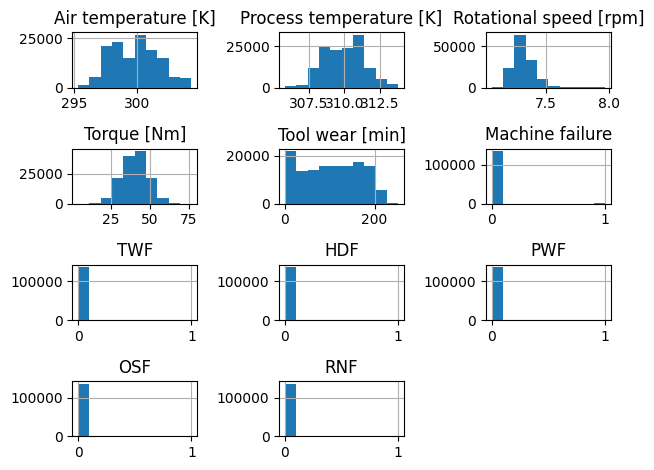

In [15]:
df.hist(column=num_cols)
plt.tight_layout()
plt.show()

범주형 데이터의 분포

In [16]:
df[cat_cols].describe()

,Product ID,Type
count,136429,136429
unique,9976,3
top,L53257,L
freq,139,95354


In [17]:
onehot_cols = []
for colname in cat_cols:
    if len(df[colname].unique()) \
        <= df.shape[0]*0.1:
        onehot_cols.append(colname)

In [18]:
cat_cols

['Product ID', 'Type']

In [19]:
df['Product Type'] = df['Product ID'].apply(lambda x: x[0])
onehot_cols.remove('Product ID')
cat_cols.append('Product Type')

# preprocessing

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer

In [21]:
for col in onehot_cols:
    mode = df[col].mode()[0]
    df[col].fillna(mode, inplace=True)

In [22]:
ohe = OneHotEncoder()
ohe = ohe.fit(df[onehot_cols])
ohe.get_feature_names_out()

array(['Type_H', 'Type_L', 'Type_M'], dtype=object)

In [23]:
df_cat_array = ohe.transform(df[onehot_cols]).toarray()
df_cat_array.shape

(136429, 3)

In [24]:
df[ohe.get_feature_names_out()] = df_cat_array
df = df.drop(columns=cat_cols)

In [25]:
# df = df.drop(columns=['Name', 'Ticket'])
# df.columns

# Correlation analysis with Pearson

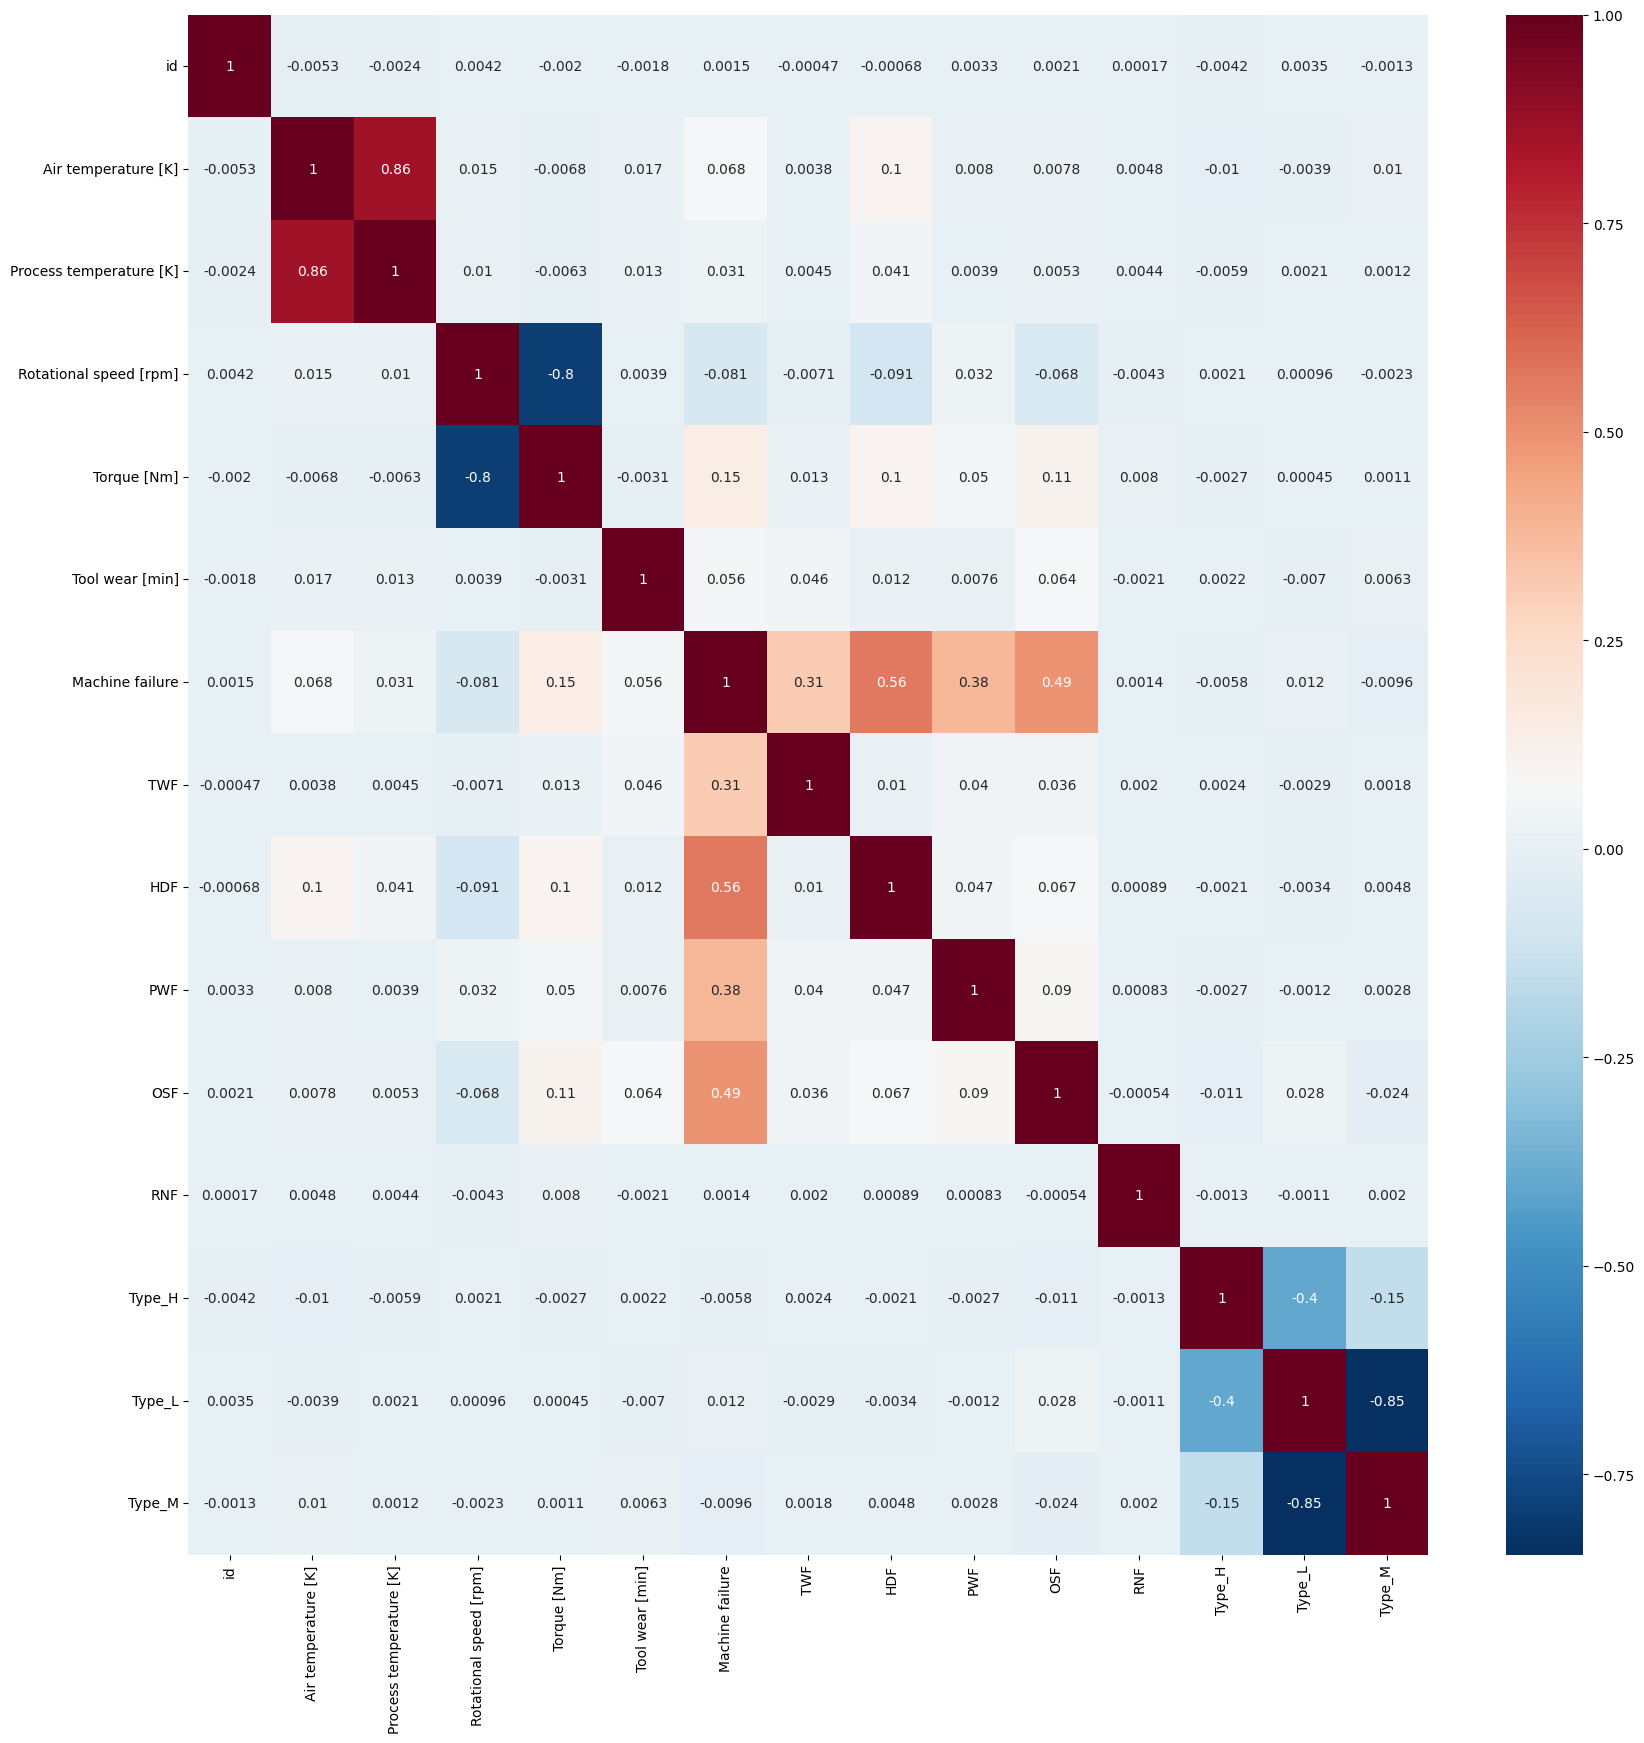

In [26]:
df_corr = df.corr()

plt.figure(figsize = (20,20))
sns.heatmap(df_corr, annot=True, cmap='RdBu_r')
plt.show()
# ex.imshow(df_corr, color_continuous_scale='RdBu_r', text_auto=True, width=1000, height=1000)
## https://plotly.com/python/heatmaps/

In [27]:
# sns.pairplot(df)

In [28]:
# feature engineering to improve performance over 0.8

In [29]:
df.columns

Index(['id', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Type_H',
       'Type_L', 'Type_M'],
      dtype='object')

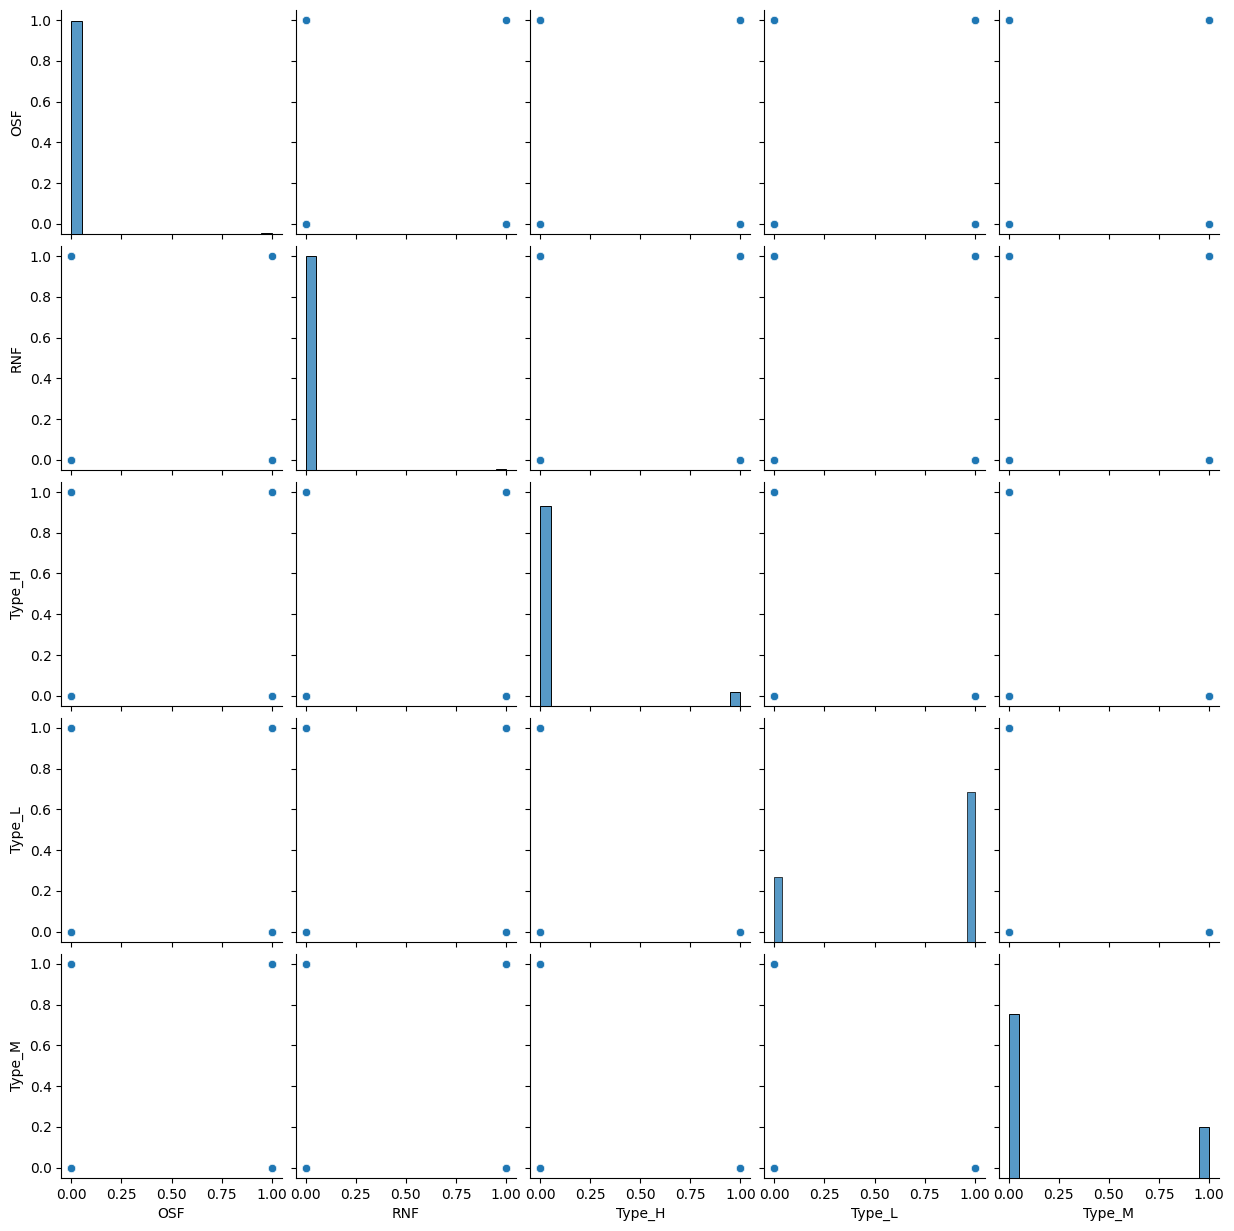

In [31]:
sns.pairplot(df.iloc[:, 10:20])